In [1]:
!rm -rf /content/segment_fluids
!git clone https://github.com/SergeyAnufriev/segment_fluids.git

Cloning into 'segment_fluids'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 33 (delta 7), reused 32 (delta 6), pack-reused 0
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.


In [2]:
import sys
sys.path.insert(0,'/content/segment_fluids')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!pip install wandb -qqq
import wandb
wandb.login()

     |████████████████████████████████| 1.8 MB 4.3 MB/s 
     |████████████████████████████████| 97 kB 5.3 MB/s 
     |████████████████████████████████| 138 kB 42.5 MB/s 
     |████████████████████████████████| 133 kB 47.9 MB/s 
     |████████████████████████████████| 178 kB 44.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 62 kB 818 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
EPOCHS = 10

In [ ]:
wandb.init(project="unet-quickstart")

# ✨ W&B: Log hyperparameters using config
cfg = wandb.config
cfg.update({"epochs" : EPOCHS})

_runtime,47
_timestamp,1627392534
_step,0


_runtime,▁
_timestamp,▁
_step,▁


In [6]:
from torch.utils.data import DataLoader
import torch
import numpy as np
from ref_unet import TurbNetG,weights_init
from data_ import Dataset_

In [7]:
device          = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dir_            = r'/content/gdrive/MyDrive/train_hydro_2021/*npz'

In [8]:
net    = TurbNetG()
net.apply(weights_init)
net.to(device)
data_loader = DataLoader(Dataset_(dir_,device),batch_size=1)

In [9]:
for input_,target_ in data_loader:
  break

In [12]:
from torch.nn import L1Loss

In [14]:
loss = L1Loss()

In [17]:
import matplotlib.pyplot as plt

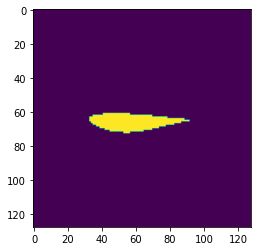

In [18]:
plt.imshow(np.reshape(input_[:,0,:,:].cpu().numpy(),(128,128)).T)

In [20]:
input_[:,0,64,64]

tensor([0.9400], device='cuda:0')

In [28]:
target_[:,3,64,64]

tensor([0.], device='cuda:0')

In [ ]:
columns    = ['id','Pressure','V_x','V_y','Void_fraction']
test_table = wandb.Table(columns=columns)

In [ ]:
counter = 0
for input_,target_ in data_loader:
  counter+=1
  if counter%100==0:
    
    output_ = net(input_)
    
    images = []

    for i in range(4):
      x        = np.reshape(target_[:,i,:,:].cpu().numpy(),(128,128)).T
      y        = np.reshape(output_[:,i,:,:].detach().cpu().numpy(),(128,128)).T
      img_data = wandb.Image(np.concatenate((x,y),axis=1))
      images.append(img_data)

    test_table.add_data(int(counter/100),*images)
    
wandb.log({'image_table3':test_table})
print(counter)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


1491


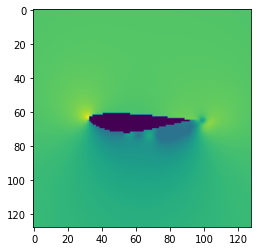

In [ ]:
plt.imshow(np.reshape(target_[:,0,:,:].cpu().numpy(),(128,128)).T)
plt.show()

In [ ]:
output = net(input_)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


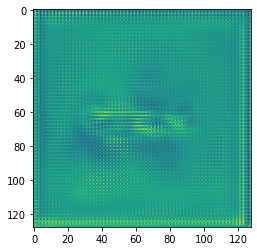

In [ ]:
plt.imshow(np.reshape(output[:,3,:,:].detach().cpu().numpy(),(128,128)).T)
plt.show()